In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Display top 10 rows
data.head(10)

In [ ]:
# display last 10 rows
data.tail(10)

In [2]:
# find shape of our dataset(number of rows and number of columns)
data.shape

(48842, 15)

In [3]:
# type of coloumns
data.dtypes


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [4]:
# fetch random samples from our dataset 50% of our dataset
data.sample(frac=0.5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
20599,26,Private,269060,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
37704,26,Private,291968,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
29762,21,State-gov,173324,Some-college,10,Never-married,Other-service,Own-child,Black,Male,0,0,20,United-States,<=50K
14368,38,Private,22463,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,45,United-States,>50K
40647,26,Private,211424,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18738,39,Private,105813,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
6510,31,Private,119735,9th,5,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Mexico,<=50K
34279,46,Private,376789,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,15,United-States,<=50K
10623,19,Federal-gov,53220,Some-college,10,Never-married,Adm-clerical,Own-child,Black,Female,0,1602,20,United-States,<=50K


In [6]:
# check null values in our dataset
data.isnull().value_counts()

age    workclass  fnlwgt  education  educational-num  marital-status  occupation  relationship  race   gender  capital-gain  capital-loss  hours-per-week  native-country  income
False  False      False   False      False            False           False       False         False  False   False         False         False           False           False     48842
Name: count, dtype: int64

In [ ]:
# replace '?' with NaN
import numpy as np
data = data.replace('?', np.NaN)

In [ ]:
# drop all rows having missing values
data = data.dropna()

In [7]:
# check for duplicate data and drop them
data.duplicated().value_counts()
data = data.drop_duplicates()

False    48790
True        52
Name: count, dtype: int64

In [ ]:
# get overall statistics of our dataset
data.describe()

<Axes: xlabel='income', ylabel='age'>

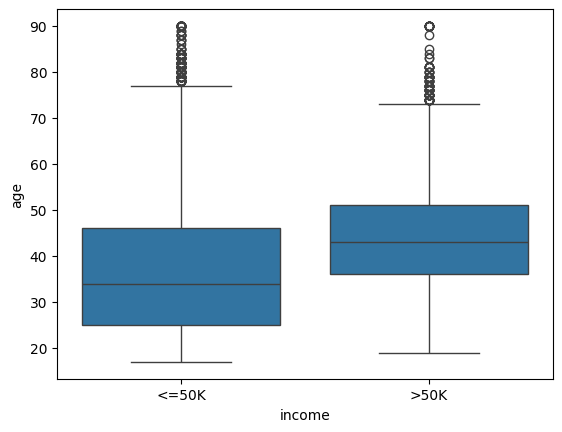

In [23]:
# bivariate analysis on graph
# seaborn library
import seaborn as sns

sns.boxplot(x='income', y='age', data=data)



# 

In [45]:
# replace salary values ['<=50k','>50k'] with [0,1]
data['income'] = data['income'].replace('<=50K', 0)
data['income'] = data['income'].replace('>50K', 1)


<Axes: xlabel='gender'>

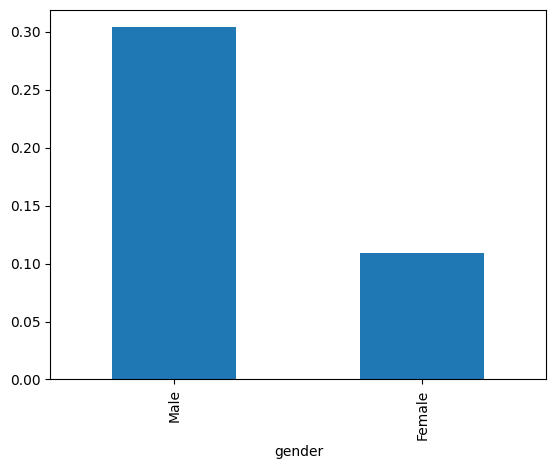

In [49]:
data.groupby('gender')['income'].mean().sort_values(ascending=False).plot(kind='bar')

In [47]:
# which workclass getting the highest salary
highest_salary_workclass = data.groupby('workclass')['income'].max()
highest_salary_workclass

# graph for highest salary workclass
# plt.bar(highest_salary_workclass.index, highest_salary_workclass.values)
# plt.xlabel('Workclass')
# plt.ylabel('Income')
# plt.title('Workclass vs Income')
# plt.show()


workclass
?                   1
Federal-gov         1
Local-gov           1
Never-worked        0
Private             1
Self-emp-inc        1
Self-emp-not-inc    1
State-gov           1
Without-pay         1
Name: income, dtype: int64

In [12]:
# convert workclass columns datatype to category datatype
data['workclass'] = data['workclass'].astype('category')
